# <font color=#F90499>**Modelo Hackathonnn**</font>
***

## <font color=#05C0F3>**Introduccion al problema**</font>

### **Sector del negocio**

Atención al cliente / Marketing / Operaciones — empresas que recopilan opiniones de clientes (reseñas, comentarios en redes sociales, encuestas de satisfacción) y quieren entender rápidamente si el sentimiento es positivo, neutro o negativo.
***

### **Descripción del proyecto**

Crear una API simple que recibe textos (comentarios, reseñas o tweets), aplica un modelo de Data Science para clasificar el sentimiento (Atrasado / Puntual → en este caso: Positivo / Neutro / Negativo o binario Positivo / Negativo) y devuelve el resultado en formato JSON, permitiendo que las aplicaciones consuman esta predicción automáticamente.
***

### **Necesidad del cliente (explicación no técnica)**

Un cliente (empresa) recibe muchos comentarios y no puede leerlos todos manualmente. Quiere:

1. saber rápidamente si los clientes se están quejando o elogiando;

2. priorizar respuestas a comentarios negativos;

3. medir la satisfacción a lo largo del tiempo.

Este proyecto ofrece una solución automática para clasificar mensajes y generar información accionable.
***

### **Validación de mercado**

Analizar si el sentimiento es útil para:

- acelerar la atención al cliente (identificar urgencias);

- monitorear campañas de marketing;

- comparar la imagen de la marca a lo largo del tiempo.

Incluso una solución simple (modelo básico) tiene valor: las pequeñas y medianas empresas utilizan herramientas similares para entender los feedbacks sin un equipo dedicado.
***

### **Expectativa para este hackathon**

**Público:** estudiantes sin experiencia profesional en el área de tecnología, que estudiaron Back-end (Java, Spring, REST, persistencia) y Data Science (Python, Pandas, scikit-learn, notebooks).

**Objetivo:** entregar un MVP funcional que demuestre la integración entre DS y Back-end: un notebook con el modelo + una API que carga ese modelo y responde a las peticiones.

**Alcance recomendado:** clasificación binaria (Positivo / Negativo) o ternaria (Positivo / Neutro / Negativo) con un modelo simple — por ejemplo, usar TF-IDF (una técnica que transforma el texto en números, mostrando qué palabras son más importantes) junto con Regresión Logística (un modelo de aprendizaje automático que aprende a diferenciar sentimientos).
***

### **Entregables deseados**

Notebook (Jupyter/Colab) del equipo de Data Science que contenga:

1. Exploración y limpieza de los datos (EDA);

2. Transformación de los textos en números con TF-IDF;

3. Entrenamiento de modelo supervisado (ej.: Logistic Regression, Naive Bayes);

4. Métricas de desempeño (Accuracy, Precision, Recall, F1-score);

5. Serialización del modelo (joblib/pickle).
***

### **Documentación mínima (README):**

- Cómo ejecutar el modelo.

- Dependencias y versiones de las herramientas.

- Demonstración funcional (Presentación corta).

- Explicar cómo el modelo llega a la predicción.
***

### **Funcionalidades exigidas (MVP)**

1. El servicio debe exponer un endpoint que devuelve la clasificación del sentimiento y la probabilidad asociada a esa clasificación. Ejemplo: POST /sentiment — acepta JSON con campo text y devuelve: `{ "prevision": "Positivo", "probabilidad": 0.87 }`

2. Modelo entrenado y cargable: el back-end debe poder usar el modelo (cargando archivo) o hacer una petición a un microservicio DS que implemente la predicción.

3. Validación de input: verificar si text existe y tiene longitud mínima; devolver error amigable en caso contrario.

4. Respuesta clara: label (+ probabilidad en 0–1) y mensaje de error cuando sea aplicable.

5. Ejemplos de uso: Postman/cURL con 3 ejemplos reales (positivo, neutro, negativo).

6. README explicando cómo ejecutar (pasos simples) y cómo probar el endpoint.
***

### **Equipo de Data Science**

- Cada equipo debe elegir o armar su propio conjunto de datos de comentarios, reseñas o publicaciones que puedan utilizarse para el análisis de sentimientos (ej.: reviews públicos, tweets, evaluaciones de productos, etc.).

- usar Python, Pandas para leer/limpiar datos;

- crear un modelo simple (TF-IDF + LogisticRegression de scikit-learn);

- guardar el pipeline y el modelo con joblib.dump.

- Poner todo en un notebook bien comentado.
***

### **Contrato de integración (definido entre DS y BE)**


Recomendamos definir desde el principio el formato JSON de entrada y salida. Sigue un ejemplo:

{"text": "..."} →

{

"prevision":"Positivo",

"probabilidad":0.9

}
***

## <font color=#05C0F3>**Librerias**</font>

In [1]:
import pandas as pd
# pd.set_option('display.max_colwidth', None)

import numpy as np

# Graficos
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Separador de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.linear_model import LogisticRegression

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluacion de metricas
from sklearn.metrics import classification_report

# Pipeline de prediccion
from sklearn.pipeline import Pipeline

# Serializacion
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <font color=#05C0F3>**Datos de comentarios de peliculas en IMDB**</font>

In [3]:
datos = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/7. Modelo Hackathon/datos/IMDB Dataset SPANISH.csv')

In [4]:
datos = datos[['review_es', 'sentimiento']]

In [5]:
display(datos)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


***

## <font color=#05C0F3>**Analisis exploratorio de datos**</font>
***

### **Muestreo Aleatorio**

In [6]:
datos.head(10)

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,Probablemente mi película favorita de todos lo...,positivo
6,Seguro que me gustaría ver una resurrección de...,positivo
7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,Alentados por los comentarios positivos sobre ...,negativo
9,"Si te gusta la risa original desgarradora, te ...",positivo


In [7]:
datos.tail(10)

,review_es,sentimiento
49990,"Cojo, cojo, cojo !!!Un festival de 90 minutos ...",negativo
49991,"Les Visiteurs, la primera película sobre los v...",negativo
49992,John Garfield interpreta a un marine que está ...,positivo
49993,Robert Colomb tiene dos trabajos a tiempo comp...,negativo
49994,Esta es tu comedia de chatarra típica. Casi no...,negativo
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo
49999,Nadie espera que las películas de Star Trek se...,negativo


In [8]:
datos.sample(10)

,review_es,sentimiento
40305,"Manténgase vivo, mantente vivo, mantente vivo,...",negativo
49091,"Rob Estes, Josie Bisset y una carga de mierda ...",positivo
22324,Otro gira con el rey del mono yendo hacia el o...,positivo
15378,... y estoy tan decepcionado porque parece que...,positivo
29803,Esta película puede parecer aterradora en los ...,negativo
17807,"Tome un mal escritorio, algunos pésimos actuan...",negativo
20324,"Terrible.Absolutamente terrible.Largo, confuso...",negativo
4019,"""El amor es una cosa de muchos esplendorios"" s...",positivo
41789,"También conocido como ""lirios de agua"", esta p...",positivo
47186,Bien.Dónde empezar.Digamos esto;Evita esta pel...,negativo


### **Verificación de Dimensiones y Tipos**

In [9]:
print(f'Los datos tienen {datos.shape[0]} filas y {datos.shape[1]} columnas.')

Los datos tienen 50000 filas y 2 columnas.


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_es    50000 non-null  object
 1   sentimiento  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### **Eliminando duplicados**

In [11]:
datos.shape

(50000, 2)

In [12]:
datos.drop_duplicates()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


In [13]:
datos.shape

(50000, 2)

No hay datos dulicados

### **Longitud de los textos**

In [14]:
datos.describe()

,review_es,sentimiento
count,50000,50000
unique,49599,2
top,"Hilarante, limpio, alegre y digno de cita.¿Qué...",positivo
freq,4,25000


In [15]:
datos['review_es'].describe()

,review_es
count,50000
unique,49599
top,"Hilarante, limpio, alegre y digno de cita.¿Qué..."
freq,4


In [16]:
datos['n_palabras'] = datos['review_es'].str.split().str.len() # Separa todas las palabras del comentario y las cuenta
datos['n_palabras']

,n_palabras
0,345
1,161
2,173
3,137
4,237
...,...
49995,170
49996,105
49997,246
49998,232


In [17]:
datos['n_palabras'].describe()

,n_palabras
count,50000.000000
mean,237.233680
std,179.529306
min,6.000000
25%,123.000000
50%,172.000000
75%,293.000000
max,2450.000000


### **Verificar la distribución de la columna objetivo (Sentimiento)**

In [18]:
datos['sentimiento'].value_counts()

,count
sentimiento,
positivo,25000
negativo,25000


In [19]:
datos['sentimiento'].value_counts(normalize=True)

,proportion
sentimiento,
positivo,0.5
negativo,0.5


In [ ]:
datos.sample(10)

,review_es,sentimiento,n_palabras
20229,Me encanta este programa. Vi a cada episodio e...,negativo,304
2904,¡Esta nueva película de Jeskid es increíble!Ec...,positivo,158
19659,Aunque podría parecer un poco extraño ver a un...,positivo,133
42911,¿Alguien piensa que este programa realmente ay...,negativo,122
22359,Este es otro festivo de miedo lleno de diversi...,positivo,348
39764,Esta es la obra maestra de Clive Barker en mi ...,positivo,91
40833,"A pesar de la historia de actuación y ""vistas ...",positivo,92
41951,"Cusack hace su mejor David Niven en este, aunq...",positivo,108
19777,Aunque este parece ser un programa bastante an...,negativo,579
37286,Buster Keaton fue posiblemente a su más agrada...,positivo,150


### **Graficos**

In [ ]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [24]:
sns.set_theme(
    style="darkgrid",
    font_scale=1.1
)

### Colores

In [26]:
color_primario = "#05C0F3"
color_secundario = "#F90499"

#### Histograma

¿Cómo es la distribución del tamaño de los textos (reviews) que usaremos para entrenar el modelo de sentimiento?

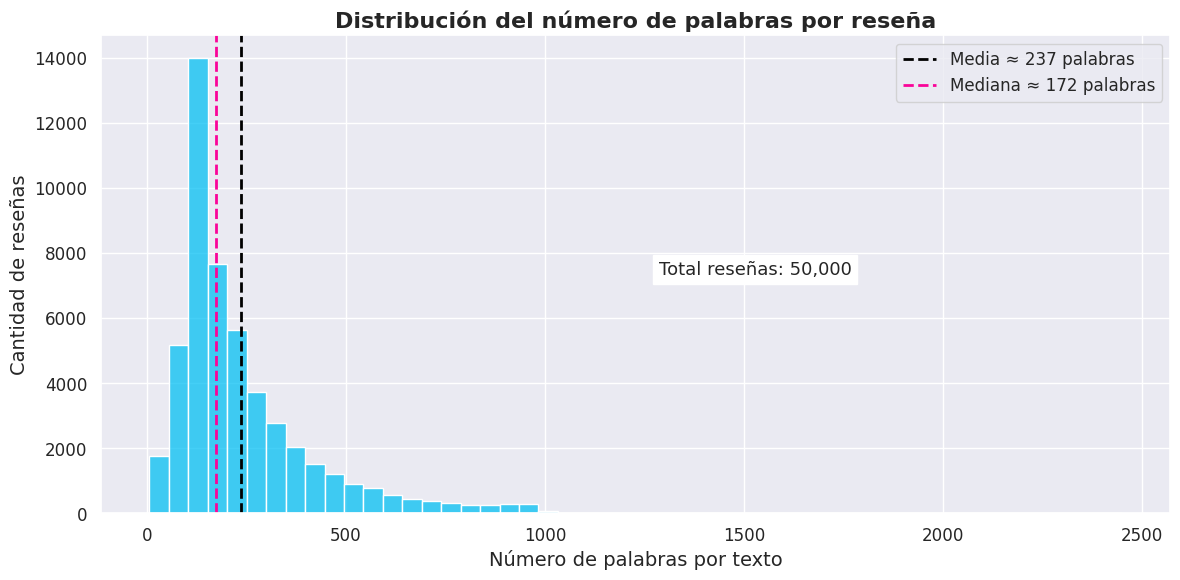

In [146]:
plt.figure(figsize=(12, 6))

sns.histplot(
    datos['n_palabras'],
    bins = 50,
    color = color_primario
    )

plt.title(
    "Distribución del número de palabras por reseña",
    fontsize = 16,
    fontweight = "bold"
)

plt.xlabel(
    "Número de palabras por texto",
    fontsize = 14
)

plt.ylabel(
    "Cantidad de reseñas",
    fontsize = 14
)

media = datos['n_palabras'].mean()
plt.axvline( # muestra la linea punteada que señala el promedio
    media,
    color = 'black',
    linestyle = "--",
    linewidth = 2,
    label = f"Media ≈ {media:.0f} palabras"
)
# Línea de referencia: mediana
mediana = datos['n_palabras'].median()
plt.axvline(
    mediana,
    color=color_secundario,
    linestyle="--",
    linewidth=2,
    label=f"Mediana ≈ {mediana:.0f} palabras"
)

plt.text(
    0.50 * plt.xlim()[1],
    0.50 * plt.ylim()[1],
    f"Total reseñas: {len(datos):,}",
    fontsize=13,
    bbox=dict(facecolor="white")
)

plt.legend() # Muestra la leyenda
plt.tight_layout()
plt.show()

#### Boxplot

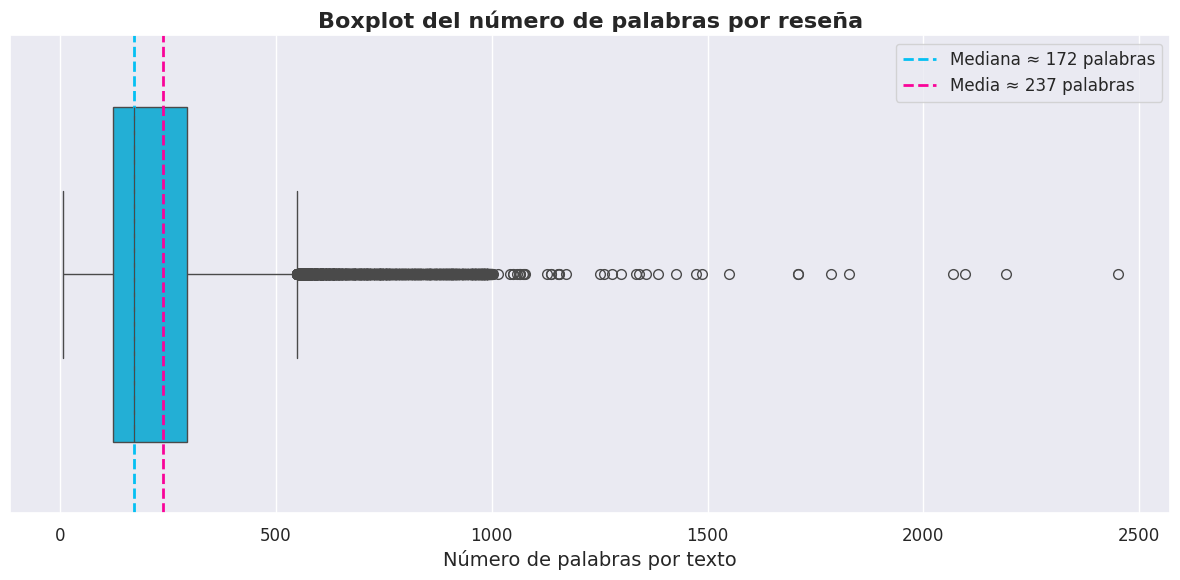

In [142]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x = datos['n_palabras'],
    color = color_primario,
    width = 0.7, # Tamaño del boxplot
    fliersize = 7, # Tamaño de los puntos atípicos
)

plt.title(
    "Boxplot del número de palabras por reseña",
    fontsize = 16,
    fontweight = "bold"
)

plt.xlabel(
    "Número de palabras por texto",
    fontsize = 14
)

# Línea de referencia: mediana
mediana = datos['n_palabras'].median()
plt.axvline(
    mediana,
    color=color_primario,
    linestyle="--",
    linewidth=2,
    label=f"Mediana ≈ {mediana:.0f} palabras"
)
# Línea de referencia: media
media = datos['n_palabras'].mean()
plt.axvline(
    media,
    color=color_secundario,
    linestyle="--",
    linewidth=2,
    label=f"Media ≈ {media:.0f} palabras"
)


plt.legend()
plt.tight_layout()
plt.show()

### **Conclusion**

El análisis descriptivo muestra que la longitud de las reseñas es altamente variable, con una media de 237 palabras y valores extremos de hasta 2450 palabras, lo que indica la presencia de outliers. Esto nos lleva a considerar estrategias de filtrado para mejorar el desempeño del modelo de análisis de sentimiento si es necesario.
***

## <font color=#05C0F3>**Limpieza de datos**</font>

### **Tratamiento de Valores Nulos e Inconsistencias**

#### Conteo de valores nulos

In [ ]:
datos.isnull().sum()

,0
review_es,0
sentimiento,0
n_palabras,0


No hay valores nulos en ninguna columna

### **Limpieza y Normalización del Texto**

#### Estandarización a minúsculas

In [ ]:
display(datos)

,review_es,sentimiento,n_palabras
0,Uno de los otros críticos ha mencionado que de...,positivo,345
1,Una pequeña pequeña producción.La técnica de f...,positivo,161
2,Pensé que esta era una manera maravillosa de p...,positivo,173
3,"Básicamente, hay una familia donde un niño peq...",negativo,137
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237
...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,170
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,105
49997,Soy católica enseñada en escuelas primarias pa...,negativo,246
49998,Voy a tener que estar en desacuerdo con el com...,negativo,232


In [ ]:
datos['review_es_limpio'] = datos['review_es'].str.lower()

In [ ]:
datos['review_es_limpio']

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producción.la técnica de f...
2,pensé que esta era una manera maravillosa de p...
3,"básicamente, hay una familia donde un niño peq..."
4,"el ""amor en el tiempo"" de petter mattei es una..."
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,"mala parcela, mal diálogo, mala actuación, dir..."
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


#### Eliminación de caracteres especiales y números

Se usa regex (expresiones regulares) para remover símbolos, números o puntuación, lo cual es esencial para el procesamiento de texto

In [ ]:
datos['review_es_limpio'] = datos['review_es_limpio'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)

In [ ]:
display(datos['review_es_limpio'])

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


`[^a-záéíóúñü\s]`

Significa:
  Cualquier carácter que NO sea:
  - letras minúsculas
  - letras con tilde
  - ñ, ü
  - espacios

#### Eliminar espacios múltiples

In [ ]:
datos['review_es_limpio'] = datos['review_es_limpio'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [ ]:
display(datos['review_es_limpio'])

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


## <font color=#05C0F3>**Transformación de Características (Feature Engineering)**</font>

In [ ]:
display(datos)

,review_es,sentimiento,n_palabras,review_es_limpio
0,Uno de los otros críticos ha mencionado que de...,positivo,345,uno de los otros críticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...,positivo,161,una pequeña pequeña producciónla técnica de fi...
2,Pensé que esta era una manera maravillosa de p...,positivo,173,pensé que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq...",negativo,137,básicamente hay una familia donde un niño pequ...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,237,el amor en el tiempo de petter mattei es una p...
...,...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,170,pensé que esta película hizo un buen trabajo a...
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,105,mala parcela mal diálogo mala actuación direcc...
49997,Soy católica enseñada en escuelas primarias pa...,negativo,246,soy católica enseñada en escuelas primarias pa...
49998,Voy a tener que estar en desacuerdo con el com...,negativo,232,voy a tener que estar en desacuerdo con el com...


### **Definición de variables de entrada (X) y salida (y)**

In [ ]:
X = datos['review_es_limpio']

In [ ]:
display(X)

,review_es_limpio
0,uno de los otros críticos ha mencionado que de...
1,una pequeña pequeña producciónla técnica de fi...
2,pensé que esta era una manera maravillosa de p...
3,básicamente hay una familia donde un niño pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
49995,pensé que esta película hizo un buen trabajo a...
49996,mala parcela mal diálogo mala actuación direcc...
49997,soy católica enseñada en escuelas primarias pa...
49998,voy a tener que estar en desacuerdo con el com...


In [ ]:
y = datos['sentimiento'].map({
    'negativo': 0,
    'positivo': 1
})

In [ ]:
display(y)

,sentimiento
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


### **División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Inicialización del Vectorizador TF-IDF**

El TF-IDF (Term Frequency-Inverse Document Frequency) es la técnica clave que transforma el texto en números, mostrando qué palabras son más importantes para cada documento/reseña.

In [ ]:
stopwords_es = stopwords.words('spanish')

In [ ]:
vectorizador = TfidfVectorizer(
    stop_words = stopwords_es,
    ngram_range = (1, 2),
    max_features = 5000,
    min_df = 5,
    max_df = 0.9
)

### **Ajuste (fit) y Transformación (transform) del conjunto de entrenamiento**

In [ ]:
X_train_tfidf  = vectorizador.fit_transform(X_train)

In [ ]:
display(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2665185 stored elements and shape (35000, 5000)>

### **Transformación del conjunto de prueba**

In [ ]:
X_test_tfidf = vectorizador.transform(X_test)

In [ ]:
display(X_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1147307 stored elements and shape (15000, 5000)>

#### Dimension

In [ ]:
X_train_tfidf.shape

(35000, 5000)

In [ ]:
X_test_tfidf.shape

(15000, 5000)

## <font color=#05C0F3>**Modelado y Evaluación**</font>

El modelo recomendado es la Regresión Logística, una técnica de clasificación supervisada simple y efectiva para este tipo de problemas.

### **Entrenamiento**

#### Inicialización del modelo de clasificación (Regresión Logística)

In [ ]:
modelo = LogisticRegression(random_state=42)

#### Entrenamiento del modelo

In [ ]:
modelo.fit(X_train_tfidf, y_train, )

LogisticRegression(random_state=42)

#### Predicciones

In [ ]:
y_pred = modelo.predict(X_test_tfidf)

In [ ]:
y_proba = modelo.predict_proba(X_test_tfidf) # Obtiene las probabilidades, esencial para el contrato de la API

### **Evaluación del Desempeño**

#### Cálculo y presentación de métricas

In [ ]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['negativo', 'positivo']))


Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.87      0.85      0.86      7411
    positivo       0.86      0.88      0.87      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



## <font color=#05C0F3>**Serialización e Integración con Back-End (Java)**</font>

Esta es la fase de entrega del artefacto. El modelo entrenado y, crucialmente, el vectorizador TF-IDF (necesario para transformar el texto de entrada que envía el BE), deben ser guardados en un formato binario (joblib o pickle)

### **Definición del Pipeline de Predicción**

Para garantizar que el Back-end (BE) pueda hacer predicciones correctas, es mejor serializar el Pipeline completo: Vectorizador + Modelo.

In [ ]:
pipeline_final = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words=stopwords_es,
        ngram_range=(1, 2),
        max_features=5000,
        min_df=5,
        max_df=0.9
    )),
    ('clf', LogisticRegression(random_state=42))
])

### **Reentrenar el pipeline con X y Y**

In [ ]:
pipeline_final.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, max_features=5000, min_df=5,
                                 ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('clf', LogisticRegression(random_state=42))])

### **Serialización**

In [ ]:
joblib.dump(pipeline_final, 'sentiment_model_1.1.joblib')

['sentiment_model.joblib']

### **Contrato de Integración y Pruebas Locales**

Prueba en Python para simular la predicción, mostrando cómo el modelo toma un texto sin procesar y genera una predicción con probabilidad.

In [ ]:
# Simulación de predicción
texto_ejemplo = "La interfaz es confusa y me hicieron esperar mucho."

In [ ]:
pred_sentimiento = pipeline_final.predict([texto_ejemplo])

In [ ]:
probabilidades = pipeline_final.predict_proba([texto_ejemplo])

In [ ]:
# Sentimiento y su probabilidad asociada (máxima probabilidad)
max_proba = np.max(probabilidades)

In [ ]:
print(f"Predicción: {pred_sentimiento}, Probabilidad: {max_proba:.2f}")

Predicción: [0], Probabilidad: 0.64


#### **FastAPI**

**El siguiente codigo es de prueba y va en el archivo del proyecto en github**

In [ ]:
# Instalaciones
pip install fastapi uvicorn joblib scikit-learn nltk # Se ejecuta en consola

# app.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np

# Cargar el modelo (UNA SOLA VEZ)
app = FastAPI(title="Sentiment Analysis API")

modelo = joblib.load("sentiment_model_1.1.joblib")

# Contrato de entrada (request)
class SentimentRequest(BaseModel):
    text: str
#    {
#        text: "La película fue excelente"
#    }

# Contrato de salida (response)
class SentimentResponse(BaseModel):
    prevision: str
    probabilidad: float

# Endpoint principal /sentiment
@app.post("/sentiment", response_model=SentimentResponse)
def predict_sentiment(request: SentimentRequest):

    texto = request.text.strip()

    if len(texto) < 10:
        raise HTTPException(
            status_code=400,
            detail="El texto es demasiado corto para analizar sentimiento"
        )

    pred = modelo.predict([texto])[0]
    proba = modelo.predict_proba([texto])[0]

    probabilidad_max = float(np.max(proba))

    sentimiento = "Positivo" if pred == 1 else "Negativo"

    return {
        "prevision": sentimiento,
        "probabilidad": round(probabilidad_max, 3)
    }

# Ejecutar el servidor
uvicorn app:app --reload # Se ejecuta en consola

POST http://localhost:8000/sentiment
Content-Type: application/json
# Eso va en:
# Postman
# Swagger
# README
# documentación

# Formato
{
  "text": "La interfaz es confusa y lenta"
}
{
  "prevision": "Negativo",
  "probabilidad": 0.92
}


**Comentario Fast API (Prueba)** **NO EJECUTAR**

**El archivo de Git tendría que tener esta estrucura**

- Modelo_hackathon.ipynb
- app.py
- requirements.txt
- sentiment_model.joblib

In [ ]:
# Arhivo txt, requirements.txt
# Dentro del archivo .txt el siguiente texto:

fastapi
uvicorn
joblib
scikit-learn
nltk
numpy

In [ ]:
# Arhivo py, app.py
# Dentro del archivo .py el siguiente codigo:

from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np
import os

# Definición de la app
app = FastAPI(title="Sentiment Analysis API")

# Cargar el modelo

MODEL_PATH = "sentiment_model.joblib" # O "sentiment_model_1.1.joblib"

if not os.path.exists(MODEL_PATH):
    raise Exception(f"No se encontró el archivo del modelo en: {MODEL_PATH}")

modelo = joblib.load(MODEL_PATH)

class SentimentRequest(BaseModel):
    text: str

class SentimentResponse(BaseModel):
    prevision: str
    probabilidad: float

@app.post("/sentiment", response_model=SentimentResponse)
def predict_sentiment(request: SentimentRequest):
    texto = request.text.strip()

    if len(texto) < 10:
        raise HTTPException(
            status_code=400,
            detail="El texto es demasiado corto para analizar sentimiento."
        )

    pred = modelo.predict([texto])[0]
    proba = modelo.predict_proba([texto])[0]

    probabilidad_max = float(np.max(proba))

    sentimiento = "Positivo" if pred == 1 else "Negativo"

    return {
        "prevision": sentimiento,
        "probabilidad": round(probabilidad_max, 3)
    }

In [ ]:
# Arhivo ipynb, Modelo_hackathon.ipynb
# El archivo .ipynb crea el archivo (sentiment_model.joblib)
# Descargar el archivo .joblib y colocarlo dentro de la estructura del Git

**Cómo ejecutarlo (Terminal)**

**CMD, Terminal o PowerShell**

- 1. Instalar las librerías (solo la primera vez): pip install -r requirements.txt
- 2. Encender el servidor: uvicorn app:app --reload